# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [2]:
import getpass

host = 'localhost'
port = 3306
database = 'lab_unsupervised_learning'

# Prompt for mysql credentials
user = getpass.getpass("Enter MySQL user: ")
password = getpass.getpass("Enter MySQL password: ")

# Create SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')

# Load table into DataFrame
customers = pd.read_sql_table('wholesale_customers_data', con=engine)


# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
customers.head(12)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [4]:
display(customers.shape)
display(customers.dtypes)
display(customers.isnull().sum())
display(customers.describe())

(440, 8)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# Notes:
# 
# - 440 x 8
# - all columns are numerical (no categorical data to convert)
# - no missing data

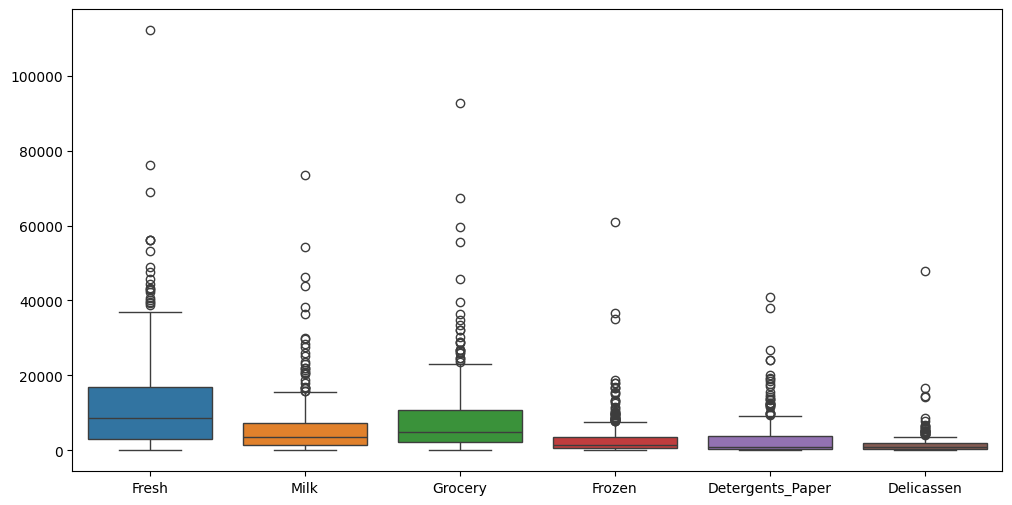

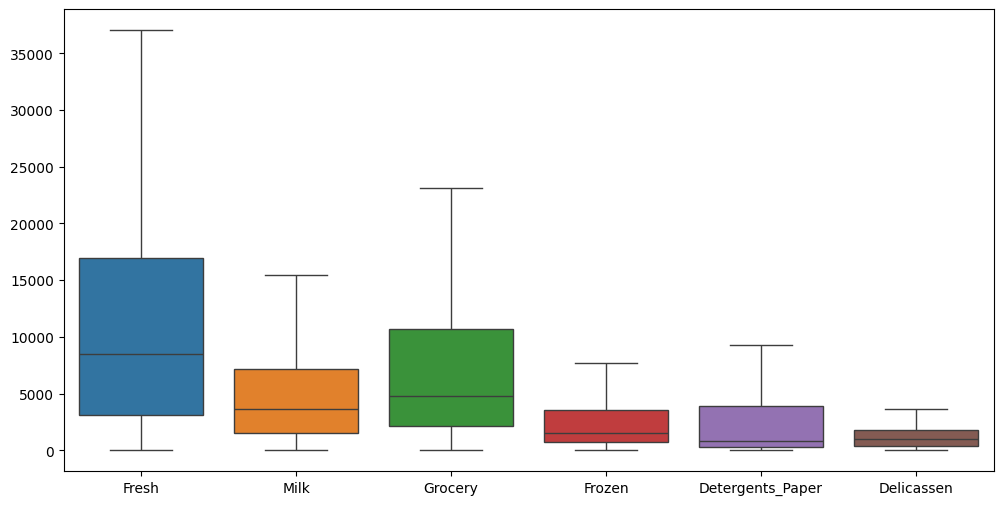

In [6]:
#
# box plots
#

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
data = customers.drop(['Channel', 'Region'], axis=1)
sns.boxplot(data=data)
plt.show()

# without outliers
plt.figure(figsize=(12,6))
data = customers.drop(['Channel', 'Region'], axis=1)
sns.boxplot(data=data, showfliers=False)
plt.show()



array([[<Axes: title={'center': 'Fresh'}>,
        <Axes: title={'center': 'Milk'}>],
       [<Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>]], dtype=object)

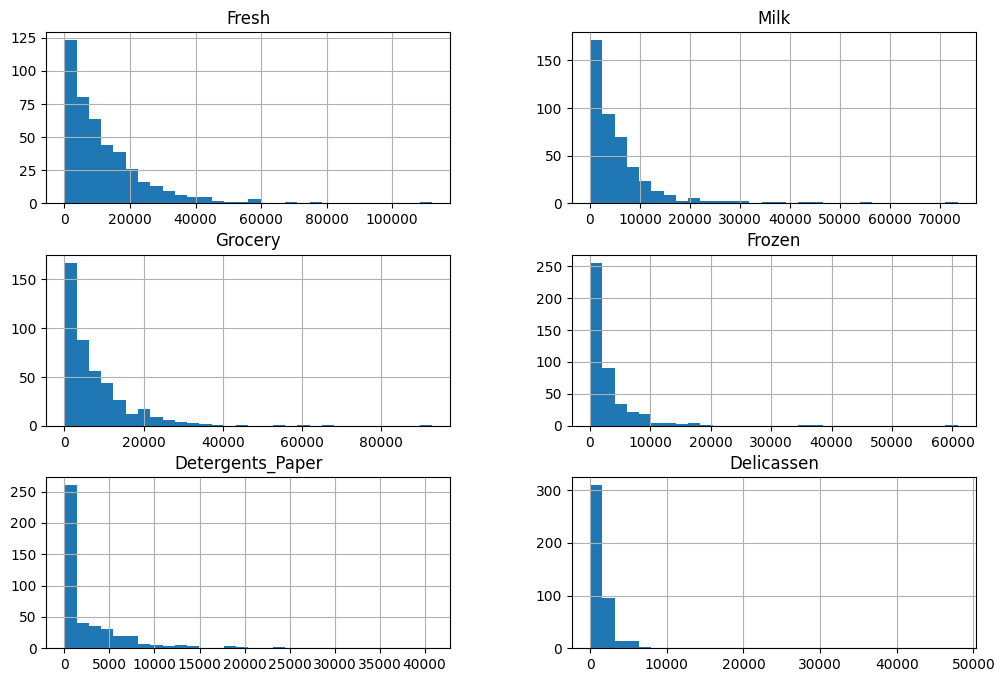

In [7]:
#
# check distributions
#

customers.drop(['Channel', 'Region'], axis=1).hist(bins=30, figsize=(12,8))

In [8]:
# Notes:
# 
# - right-skewed distributions

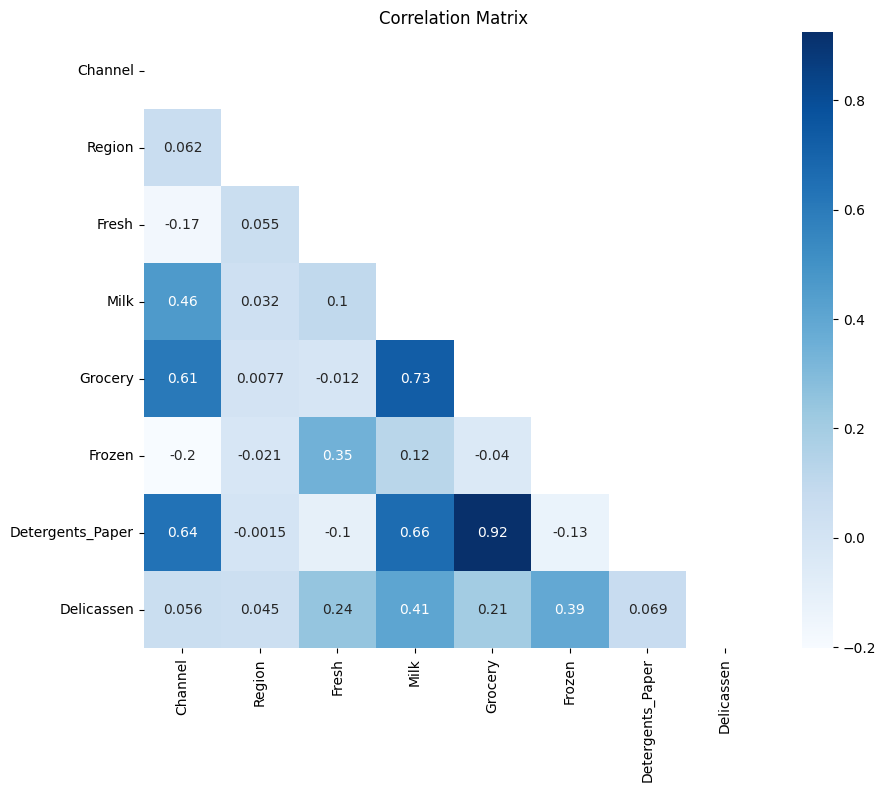

In [9]:
#
# Correlation matrix
#

corr = customers.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', mask=mask)
plt.title('Correlation Matrix')
plt.show()


In [10]:
# 
# Check if it follows Pareto Principle
# 

customers['TotalSales'] = customers.sum(axis=1)
customers_sorted = customers.sort_values(by='TotalSales', ascending=False)
customers_sorted['CumulativeSum'] = customers_sorted['TotalSales'].cumsum()
total_sales = customers_sorted['TotalSales'].sum()
customers_sorted['CumulativePercent'] = customers_sorted['CumulativeSum'] / total_sales

# top 20% customers
top_20_percent_index = int(len(customers_sorted) * 0.2)
pareto_sales = customers_sorted.iloc[:top_20_percent_index]['TotalSales'].sum()
pareto_ratio = pareto_sales / total_sales
print(f"Top 20% customers account for {pareto_ratio:.2%} of total sales.")


# top 25% customers
top_25_percent_index = int(len(customers_sorted) * 0.25)
pareto_sales_25 = customers_sorted.iloc[:top_25_percent_index]['TotalSales'].sum()
pareto_ratio_25 = pareto_sales_25 / total_sales
print(f"Top 25% customers account for {pareto_ratio_25:.2%} of total sales.")


Top 20% customers account for 42.90% of total sales.
Top 25% customers account for 49.60% of total sales.


In [11]:
#
# - In this case, it doesn't follow the 80/20 rule
# - # We can see however that 25% of customers account for half of the sales.
#

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [12]:
# 
# Will just drop the column TotalSales the we added to check if the data follows the 80/20 rule.
# Apart from that, no further data cleaning neaded: all columns are numerical with the correct data types, no null values.
#

customers = customers.drop(columns=["TotalSales"])


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [13]:
from sklearn.preprocessing import StandardScaler

customers.columns = [str(col) for col in customers.columns]

# scale
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)

# load as a pandas df
customers_scale = pd.DataFrame(customers_scale, columns=customers.columns)

customers_scale.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the .fit method, there is an attribute called labels_ which is the cluster number assigned to each data record. What you can do is to assign these labels back to customers in a new column called customers['labels']. Then you'll see the cluster results of the original data.


In [14]:
from sklearn.cluster import KMeans

# Initiate and fit KMeans
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(customers_scale)

# Assign cluster labels to original data
customers['labels'] = kmeans.labels_

# Check results
customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


Count the values in `labels`.

In [15]:
customers['labels'].value_counts()


labels
1    179
0     90
5     80
4     36
2     24
8     24
7      4
3      2
6      1
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [16]:
from sklearn.cluster import DBSCAN

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)

# Assign DBSCAN labels
customers['labels_DBSCAN'] = dbscan.labels_

# Check result
customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,-1
2,2,3,6353,8808,7684,2405,3516,7844,0,-1
3,1,3,13265,1196,4221,6404,507,1788,1,1
4,2,3,22615,5410,7198,3915,1777,5185,0,-1


Count the values in `labels_DBSCAN`.

In [17]:
customers['labels_DBSCAN'].value_counts()

labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

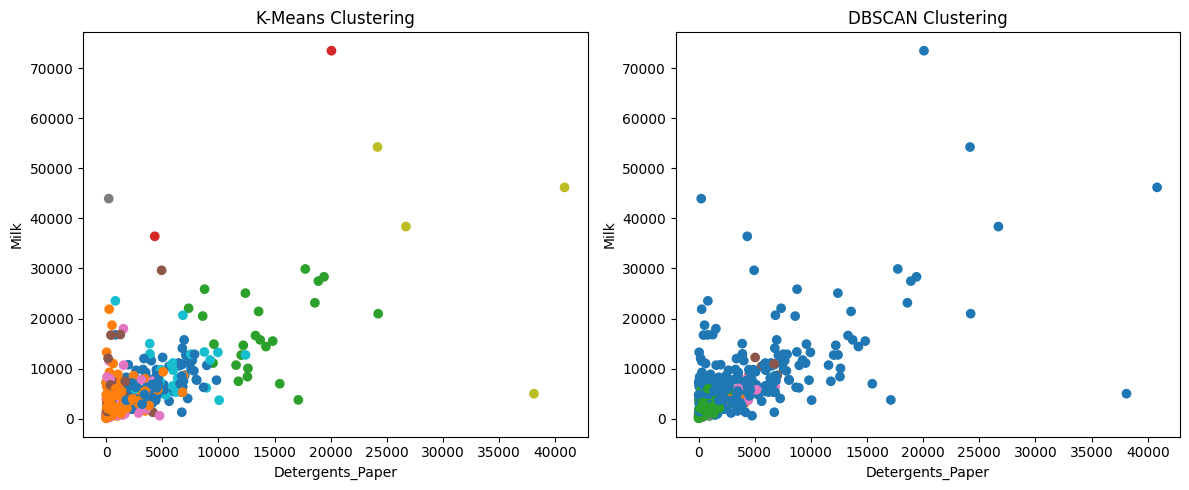

In [18]:
# Detergents_Paper & Milk

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-Means scatter plot
axes[0].scatter(
    customers['Detergents_Paper'], 
    customers['Milk'], 
    c=customers['labels'], 
    cmap='tab10'
)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Detergents_Paper')
axes[0].set_ylabel('Milk')

# DBSCAN scatter plot
axes[1].scatter(
    customers['Detergents_Paper'], 
    customers['Milk'], 
    c=customers['labels_DBSCAN'], 
    cmap='tab10'
)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Detergents_Paper')
axes[1].set_ylabel('Milk')

plt.tight_layout()
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

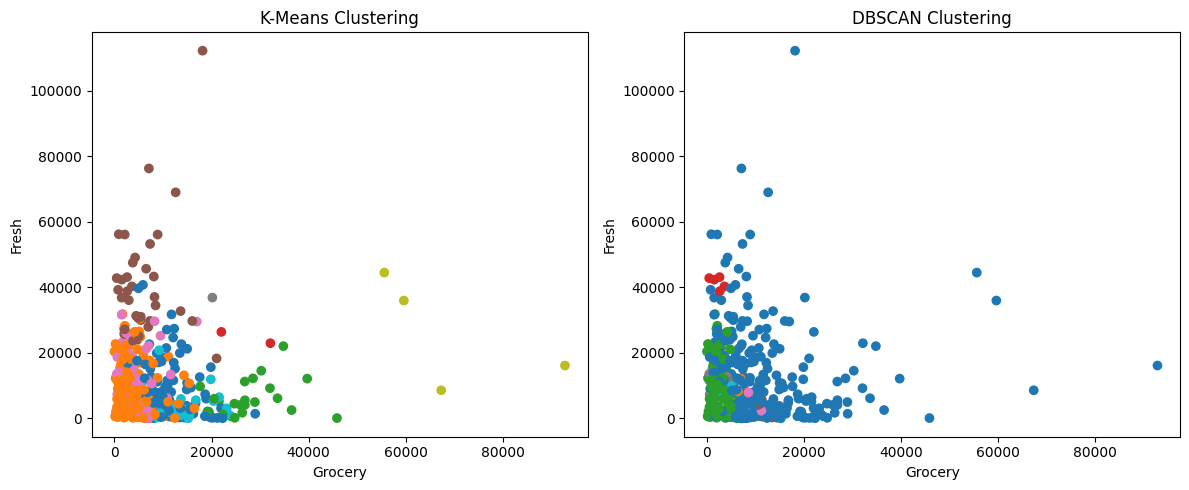

In [19]:
# Grocery & Fresh

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-Means scatter plot
axes[0].scatter(
    customers['Grocery'],
    customers['Fresh'],
    c=customers['labels'],
    cmap='tab10'
)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Grocery')
axes[0].set_ylabel('Fresh')

# DBSCAN scatter plot
axes[1].scatter(
    customers['Grocery'],
    customers['Fresh'],
    c=customers['labels_DBSCAN'],
    cmap='tab10'
)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Grocery')
axes[1].set_ylabel('Fresh')

plt.tight_layout()
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

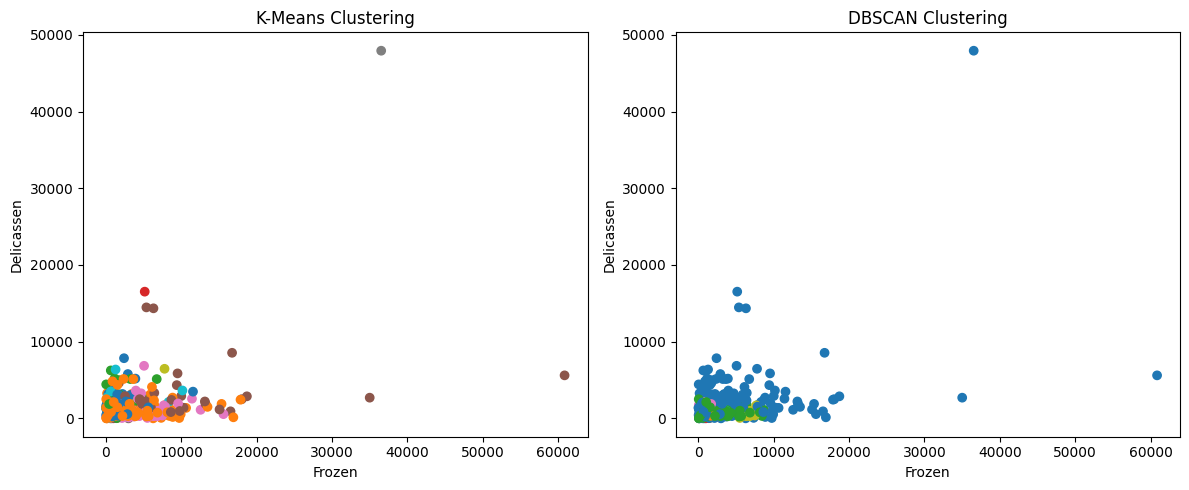

In [20]:
# Frozen & Delicassen

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-Means scatter plot
axes[0].scatter(
    customers['Frozen'],
    customers['Delicassen'],
    c=customers['labels'],
    cmap='tab10'
)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Frozen')
axes[0].set_ylabel('Delicassen')

# DBSCAN scatter plot
axes[1].scatter(
    customers['Frozen'],
    customers['Delicassen'],
    c=customers['labels_DBSCAN'],
    cmap='tab10'
)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Frozen')
axes[1].set_ylabel('Delicassen')

plt.tight_layout()
plt.show()



Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [21]:
# Group by K-Means labels and get means
kmeans_means = customers.drop(columns=["Channel", "Region"]).groupby('labels').mean()

# Group by DBSCAN labels and get means
dbscan_means = customers.drop(columns=["Channel", "Region"]).groupby('labels_DBSCAN').mean()

print("K-Means cluster means:\n", kmeans_means)
print("\nDBSCAN cluster means:\n", dbscan_means)


K-Means cluster means:
                Fresh          Milk       Grocery        Frozen  \
labels                                                           
0        9729.188889   7267.222222  11346.211111   1511.877778   
1        9263.787709   2994.860335   3430.547486   2668.122905   
2        5924.833333  16977.500000  27370.416667   1692.958333   
3       24649.000000  54960.500000  27066.500000   3070.500000   
4       40370.166667   5327.916667   6045.138889   9770.416667   
5       10732.637500   2781.087500   3745.212500   2994.837500   
6       36847.000000  43950.000000  20170.000000  36534.000000   
7       26272.500000  35951.250000  68811.750000   3048.250000   
8        4204.916667  10033.291667  14152.208333   2131.916667   

        Detergents_Paper    Delicassen  labels_DBSCAN  
labels                                                 
0            4578.488889   1480.655556      -0.333333  
1             763.770950   1019.659218       0.452514  
2           13761.541667 

Which algorithm appears to perform better?

In [22]:
# 
# Visually:
# - K-Means may be more relevant for some categories (e.g. Grocery vs. Fresh)
# 
# Based on the means:
# - We want high between-cluster variance (if cluster means differ more, our clusters will be more distinct and meaningful)
# - K-Means clusters have larger variation in means across clusters -some clusters show very high values in certain columns (e.g., cluster 3 with very high Milk, Fresh).
# - DBSCAN has a big noise cluster (-1), and many smaller clusters with less distinct means.
# 
# Conclusion:
# - K-Means tends to create more balanced, well-separated clusters in this case.
# - DBSCAN may identify dense clusters but leaves many points as noise or smaller groups, so means overlap more.
# 

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [23]:
# Your code here

In [24]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [25]:
# Your code here

In [26]:
# Your comment here